In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


#EDA &amp; Dataset Preparation

In [3]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Check the shapes of the dataset
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [5]:
# Plot sample images
def plot_sample_images(images, labels, num=10):
    plt.figure(figsize=(15, 5))
    for i in range(num):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {labels[i][0]}')
        plt.axis("off")
    plt.show()

Sample Images from CIFAR-10 Training Set:


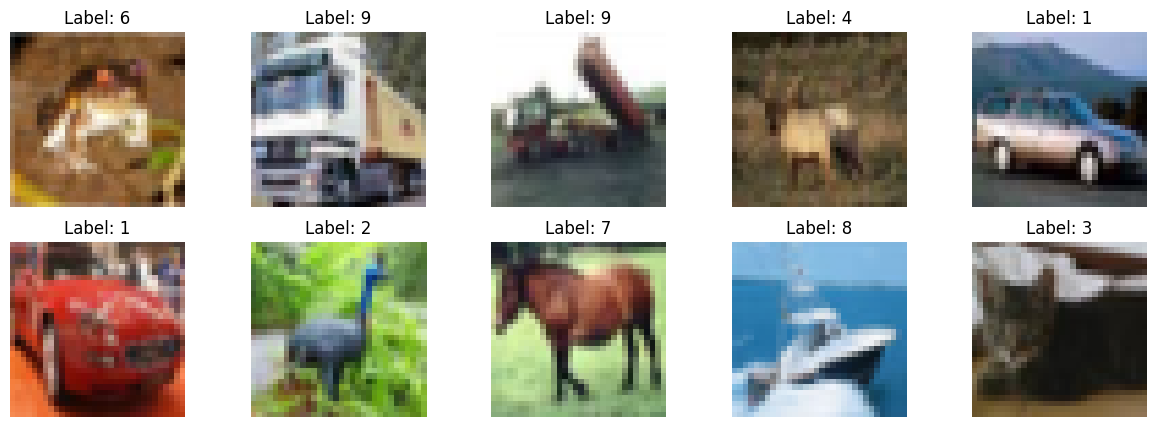

In [6]:
# Display some sample images from the training set
print("Sample Images from CIFAR-10 Training Set:")
plot_sample_images(x_train, y_train, num=10)

In [7]:
# Check the unique classes
unique_classes = np.unique(y_train)
print("Unique classes in the dataset:", unique_classes)

Unique classes in the dataset: [0 1 2 3 4 5 6 7 8 9]


In [8]:
# use the class names instead of numerical labels
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

In [9]:
# Display the class names
for i in unique_classes:
    print(f'Class {i}: {class_names[i]}')

Class 0: airplane
Class 1: automobile
Class 2: bird
Class 3: cat
Class 4: deer
Class 5: dog
Class 6: frog
Class 7: horse
Class 8: ship
Class 9: truck


#Model Implementation &amp; Fine-Tuning

In [10]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

In [11]:
# Define Vanilla Autoencoder using Functional API
def build_vanilla_autoencoder():
    input_img = Input(shape=(32, 32, 3))

    # Encoder
    x = Flatten()(input_img)  # Flatten input to 1D vector
    x = Dense(512, activation='relu')(x)  # Encoder layer
    x = Dense(128, activation='relu')(x)  # Bottleneck layer (latent space)

    # Decoder
    x = Dense(512, activation='relu')(x)  # Decoder layer
    x = Dense(32 * 32 * 3, activation='sigmoid')(x)  # Output layer
    output_img = Reshape((32, 32, 3))(x)  # Reshape to original image size

    # Define the model
    autoencoder = Model(input_img, output_img)

    # Compile the model
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

In [12]:
# Instantiate and compile the vanilla autoencoder
vanilla_autoencoder = build_vanilla_autoencoder()
vanilla_autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3072)                │       1,575,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 32, 32, 3)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,281,024 (12.52 MB)

 Trainable params: 3,281,024 (12.52 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the Vanilla Autoencoder
history_vanilla = vanilla_autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.6389 - val_loss: 0.5929
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5902 - val_loss: 0.5863
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5847 - val_loss: 0.5829
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5815 - val_loss: 0.5817
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5802 - val_loss: 0.5806
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5796 - val_loss: 0.5801
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5790 - val_loss: 0.5798
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5788 - val_loss: 0.5790
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5779 - val_loss: 0.5786
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5776 - val_loss: 0.5788
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5770 - val_loss: 0.5782
Epoch 12/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/ste

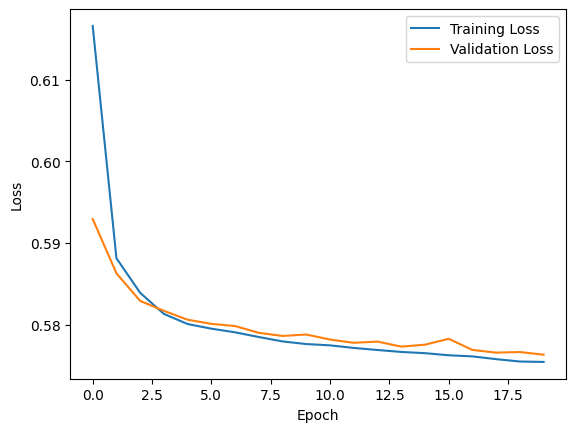

In [14]:
# Plot training and validation loss
plt.plot(history_vanilla.history['loss'], label='Training Loss')
plt.plot(history_vanilla.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# Function to display original and reconstructed images
def display_reconstructed_images(autoencoder, images, num_images=10):
    reconstructed_images = autoencoder.predict(images[:num_images])
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Original image
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(images[i])
        plt.title("Original")
        plt.axis("off")

        # Reconstructed image
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed_images[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

Original vs. Reconstructed Images (Vanilla Autoencoder):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


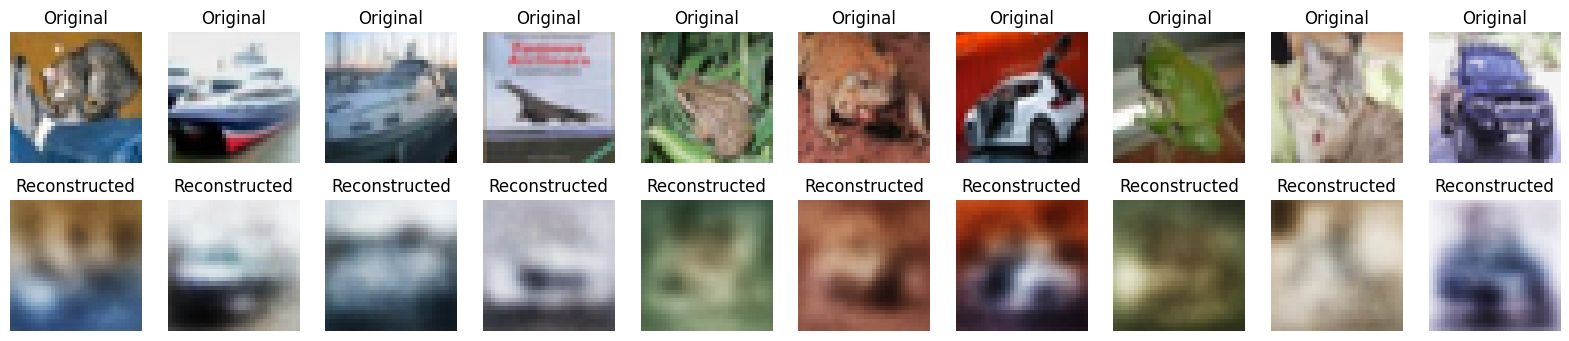

In [16]:
# Display original and reconstructed images from the test set
print("Original vs. Reconstructed Images (Vanilla Autoencoder):")
display_reconstructed_images(vanilla_autoencoder, x_test)

#Model Evaluation &amp; Comparative Analysis

##Reconstruction Quality Using Performance Metrics

####Reconstruction Loss and Mean Square Error (MSE)

In [17]:
from sklearn.metrics import mean_squared_error
import time

# Compute reconstruction loss on test data
reconstruction_loss = vanilla_autoencoder.evaluate(x_test, x_test, verbose=0)

# Compute Mean Squared Error (MSE) for the reconstructed images
reconstructed_images = vanilla_autoencoder.predict(x_test)
mse_list = [mean_squared_error(x_test[i].flatten(), reconstructed_images[i].flatten()) for i in range(len(x_test))]
mean_mse = np.mean(mse_list)

print(f"Reconstruction Loss (Binary Crossentropy): {reconstruction_loss:.4f}")
print(f"Mean Squared Error (MSE): {mean_mse:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Reconstruction Loss (Binary Crossentropy): 0.5763
Mean Squared Error (MSE): 0.0112


##Efficiency

####Measure Inference Time

In [18]:
# Measure inference time for a batch of 100 images
num_samples = 100
sample_images = x_test[:num_samples]

start_time = time.time()
_ = vanilla_autoencoder.predict(sample_images)
end_time = time.time()

inference_time = (end_time - start_time) / num_samples
print(f"Average Inference Time per Image: {inference_time:.6f} seconds")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Average Inference Time per Image: 0.003593 seconds


####Measure Memory Usage

In [19]:
import tracemalloc

# Start tracing memory allocation
tracemalloc.start()

# Perform inference
_ = vanilla_autoencoder.predict(sample_images)

# Get the current memory usage
current, peak = tracemalloc.get_traced_memory()
print(f"Current Memory Usage: {current / 10**6:.2f} MB")
print(f"Peak Memory Usage: {peak / 10**6:.2f} MB")

# Stop tracing
tracemalloc.stop()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Current Memory Usage: 1.32 MB
Peak Memory Usage: 1.36 MB


####Compile Results into a Report

In [20]:
from tabulate import tabulate

# Prepare results for Vanilla Autoencoder
results = [
    ["Reconstruction Loss (Binary Crossentropy)", reconstruction_loss],
    ["Mean Squared Error (MSE)", mean_mse],
    ["Average Inference Time per Image (s)", inference_time],
    ["Peak Memory Usage (MB)", peak / 10**6]
]

# Print results in a table format
print(tabulate(results, headers=["Metric", "Value"], tablefmt="grid"))

+-------------------------------------------+------------+
| Metric                                    |      Value |
+===========================================+============+
| Reconstruction Loss (Binary Crossentropy) | 0.576312   |
+-------------------------------------------+------------+
| Mean Squared Error (MSE)                  | 0.0111522  |
+-------------------------------------------+------------+
| Average Inference Time per Image (s)      | 0.00359317 |
+-------------------------------------------+------------+
| Peak Memory Usage (MB)                    | 1.35747    |
+-------------------------------------------+------------+
